First Practical Project - MINDD
-----
-----

Authors:
--------
Ana Rita Silva - 1211152

Jorge Cruz - 


-----

This project applies data mining techniques to predict the success of a bank's telemarketing campaigns, identifying customeres most likely to subscribe to term deposits. Following th CRISP-DM methodology, the work covers data analysis, preparation, modeling, and evaluation stages, aiming to supporta strategic, data-driven decision making.

# 1. Data Presentation and Exploratory Analysis

In this first chapter, the dataser used in this project is presented, followed by a detailed exploratoru analysis aimed at understanding the structure, characteristics and potential patterns relevant to the modeling phase.

#### Imports of the libraries

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

 ##### Loading the dataset

In [93]:
df = pd.read_csv('bank.csv', delimiter=";")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


##### First 5 rows of the dataset

In [71]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


##### Last 5 rows of the dataset

In [72]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


##### Shape and size of the dataset

In [73]:
shape = df.shape
size = df.size
print('Number of rows: ', shape[0])
print('Number of columns: ', shape[1])
print('Size of the dataset: ', size)

Number of rows:  41188
Number of columns:  21
Size of the dataset:  864948


##### Number of columns

In [74]:
len(df.columns)

21

##### Separation of the features into two lists (categorical and numerical)

In [94]:
all_columns = df.columns
goal_attribute = 'y'
predictors = all_columns.drop(goal_attribute)

categorical_predictors = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numeric_predictors = predictors.drop(categorical_predictors)

print('Predictors:', list(predictors))
print()
print('Categorical Predictors:', list(categorical_predictors))
print()
print('Numeric Predictors:', list(numeric_predictors))

Predictors: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

Categorical Predictors: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

Numeric Predictors: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


##### Checking de types of the columns

In [76]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

##### Dropping duplicated rows

In [95]:
df.drop_duplicates()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


##### Target Variable

In [96]:
y_counts = df['y'].value_counts()
y_percentage = df['y'].value_counts(normalize=True)*100

y_var_dataframe = pd.DataFrame({
    "Count": y_counts,
    "Percentage": y_percentage
})

y_var_dataframe

,Count,Percentage
y,,
no,36548,88.734583
yes,4640,11.265417


-----
#### Descriptive statistics
-----


##### For numeric predictors

In [97]:
df.describe(include=['float64', 'int64'])

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


##### For categoric predictors

In [98]:
df.describe(include=['object'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


-----
#### Univariate Variables
-----

##### For numeric predictors

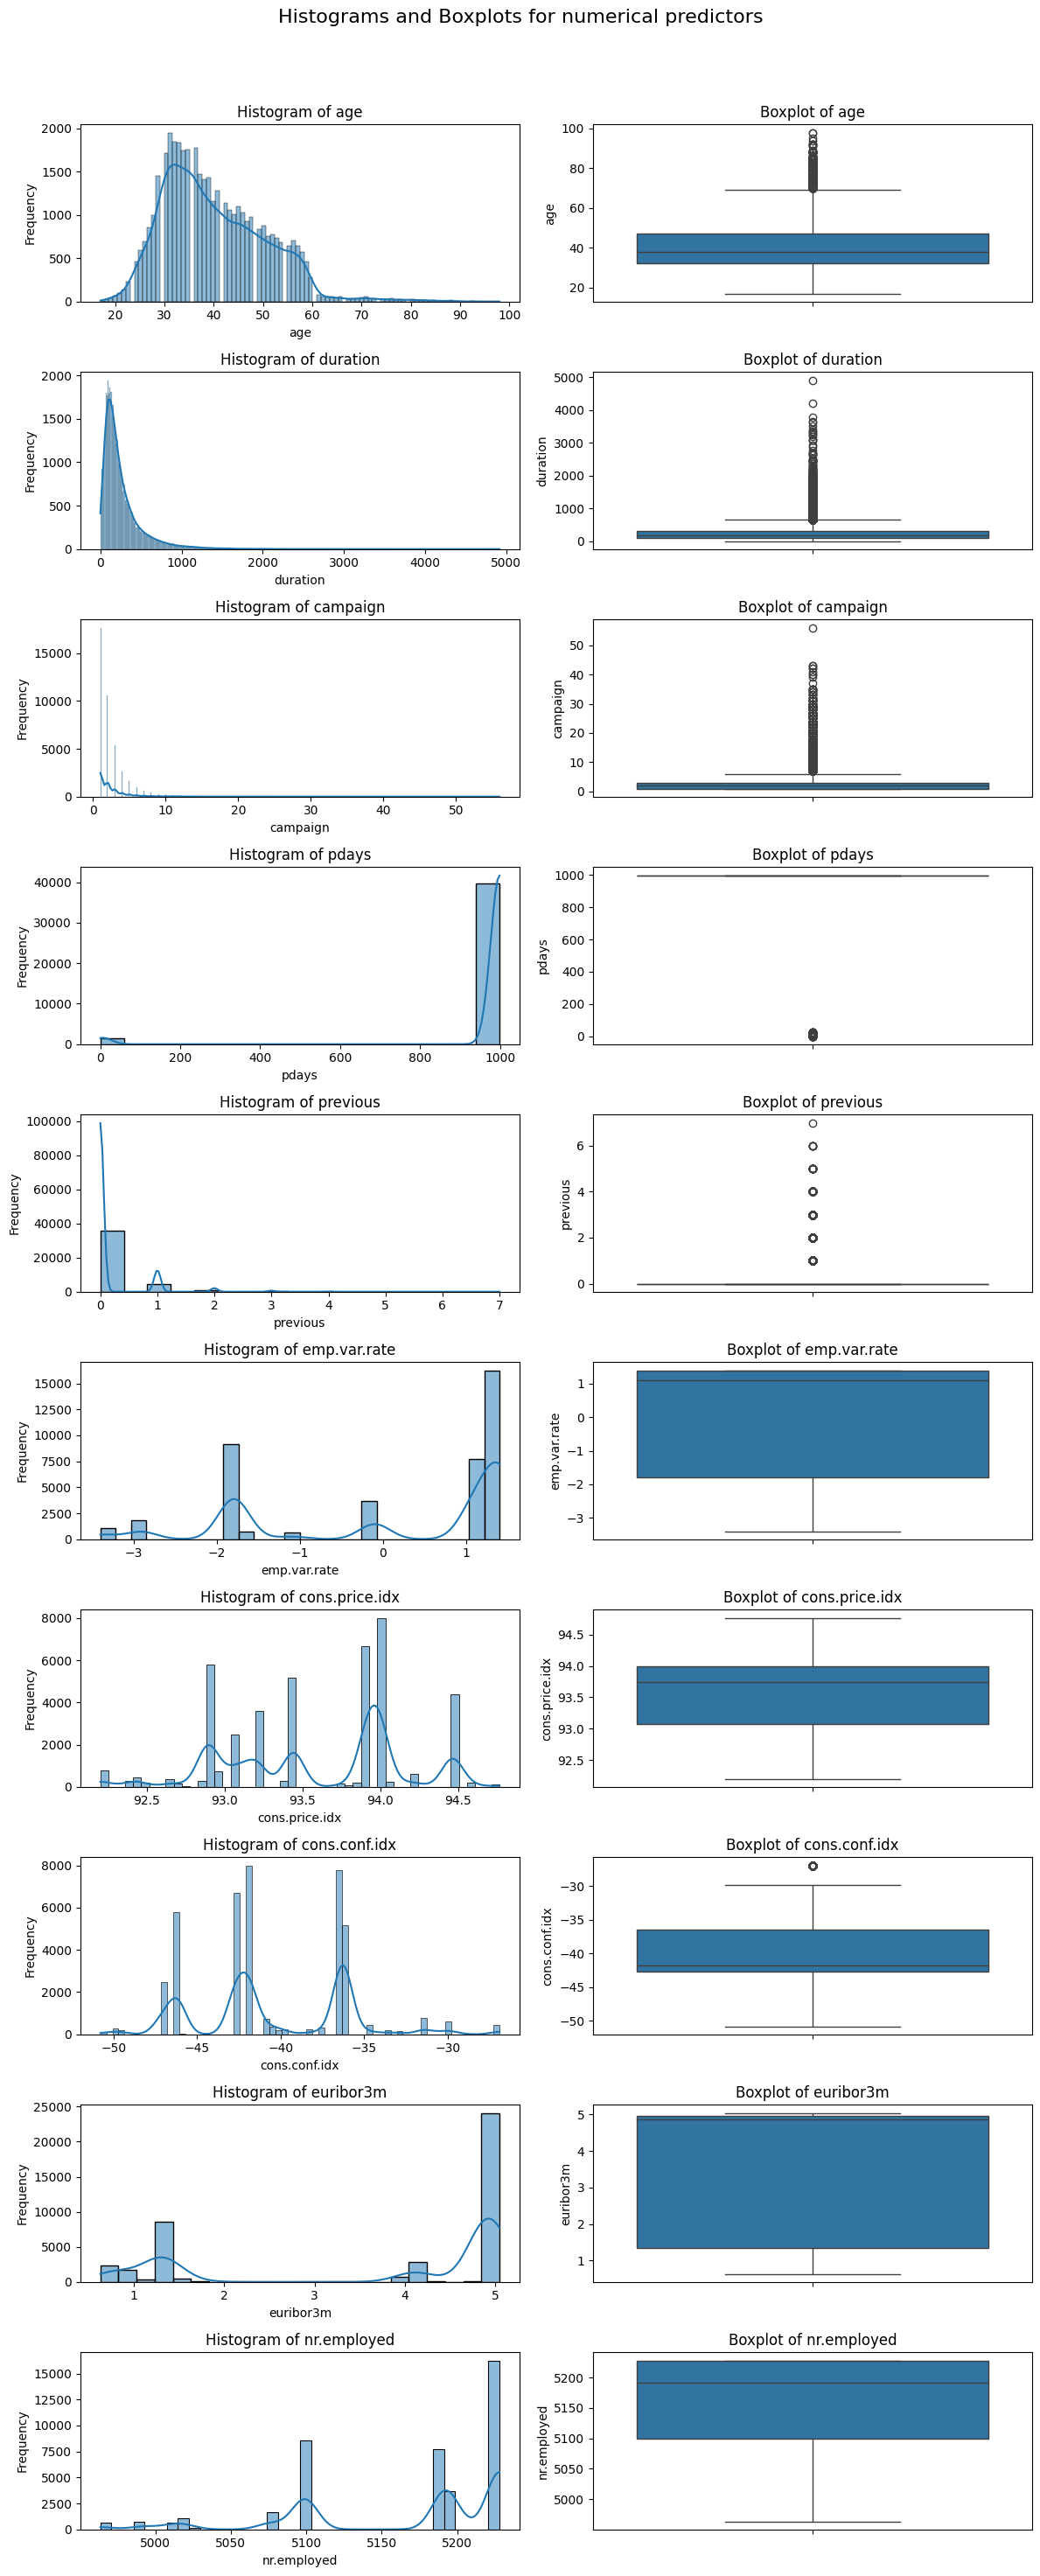

In [83]:
fig, axe = plt.subplots(nrows = len(numeric_predictors), ncols = 2, figsize = (12, 3*len(numeric_predictors)))
fig.suptitle('Histograms and Boxplots for numerical predictors', fontsize=16)

for i, column in enumerate(numeric_predictors):
    sns.histplot(df[column], ax=axe[i, 0], kde=True)
    axe[i, 0].set_title(f"Histogram of {column}")
    axe[i, 0].set_xlabel(column)
    axe[i, 0].set_ylabel("Frequency")

    sns.boxplot(y=df[column], ax=axe[i, 1])
    axe[i, 1].set_title(f"Boxplot of {column}")
    axe[i, 1].set_ylabel(column)


plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

##### For categorical predictors

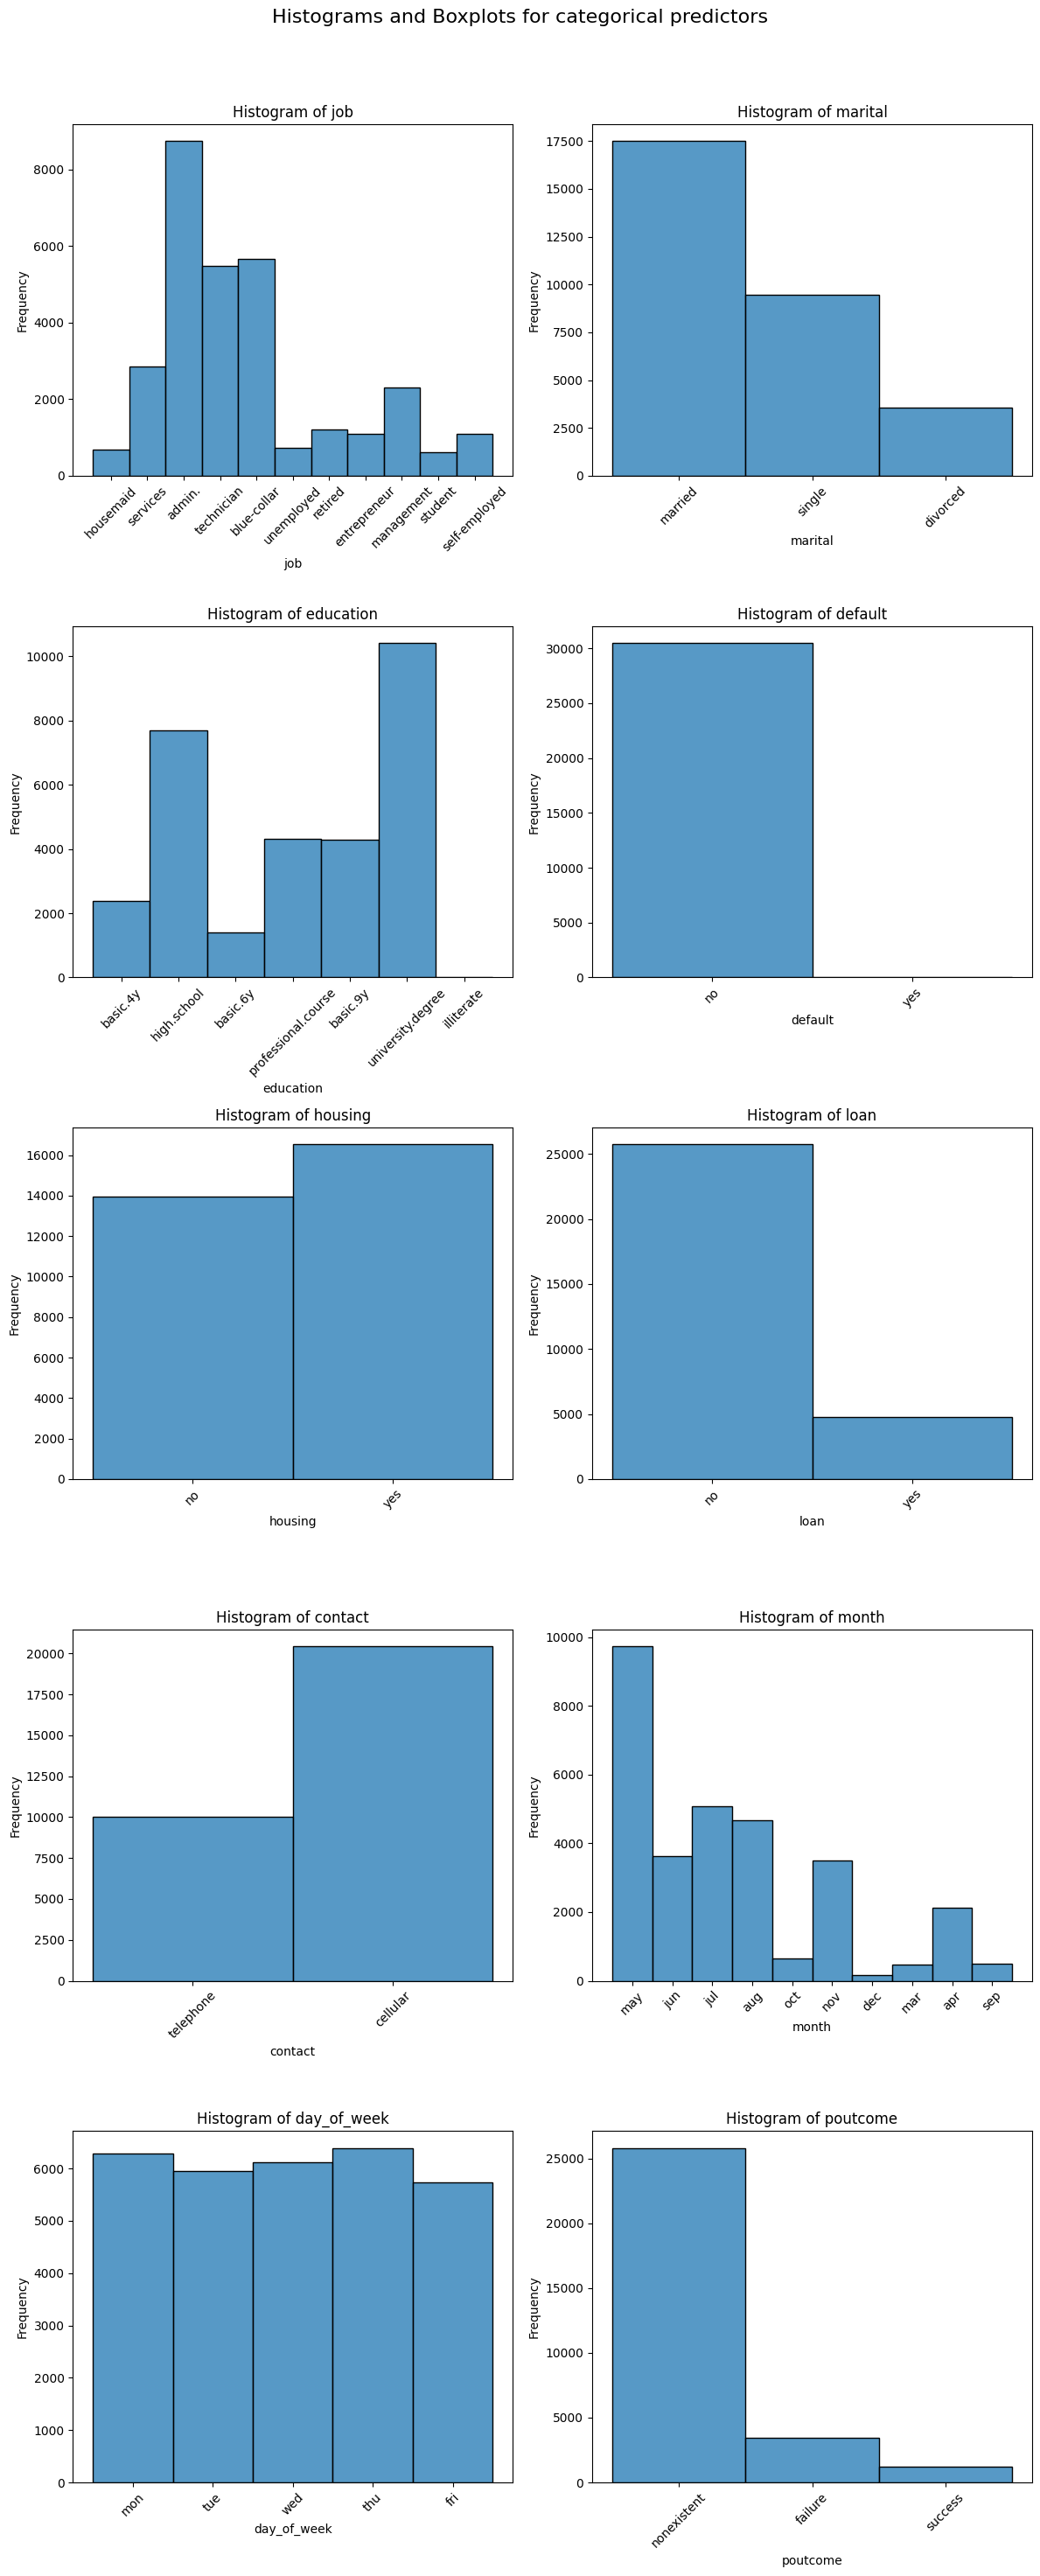

In [43]:
fig, axes = plt.subplots(nrows = int(len(categorical_predictors)/2), ncols = 2, figsize = (12, 3*len(categorical_predictors)))
fig.suptitle('Histograms and Boxplots for categorical predictors', fontsize=16)

lin = 0
for i, column in enumerate(categorical_predictors):
    col = i % 2 
    sns.histplot(df[column], ax=axes[lin, col])
    axes[lin, col].set_title(f"Histogram of {column}")
    axes[lin, col].set_xlabel(column)
    axes[lin, col].set_ylabel("Frequency")
    axes[lin, col].tick_params(axis='x', rotation=45)

    if i%2 == 1:
        lin = lin + 1


plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

-----
#### Bivariate Variables
-----

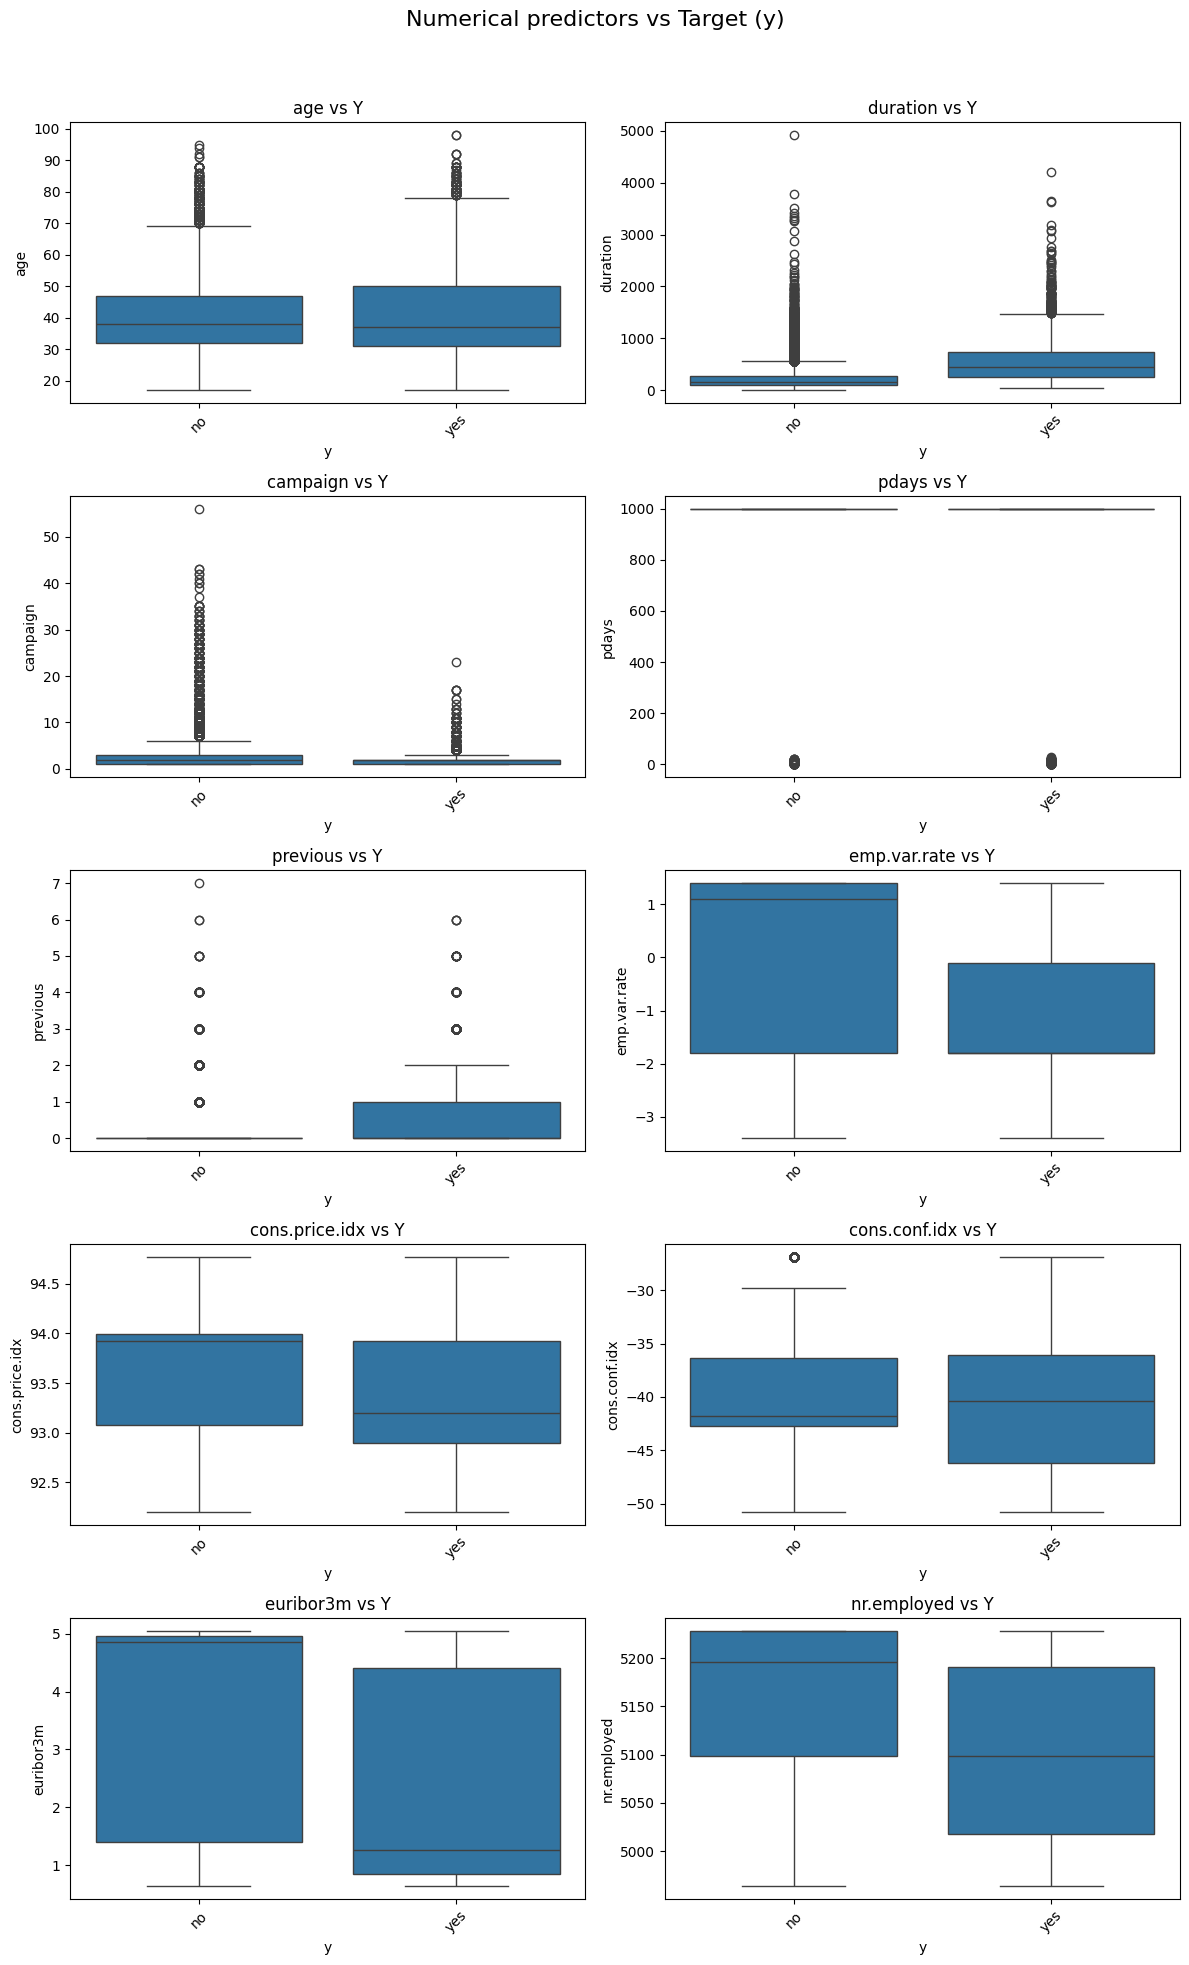

In [84]:
fig, axes = plt.subplots(nrows = int(len(numeric_predictors)/2), ncols = 2, figsize = (12, 2*len(categorical_predictors)))
fig.suptitle('Numerical predictors vs Target (y)', fontsize=16)

lin = 0
for i, column in enumerate(numeric_predictors):
    col = i % 2
    sns.boxplot(data = df, x = goal_attribute, y = column, ax=axes[lin, col])
    axes[lin, col].set_title(f"{column} vs Y")
    axes[lin, col].set_xlabel("y")
    axes[lin, col].set_ylabel(column)
    axes[lin, col].tick_params(axis='x', rotation=45)

    if i%2 == 1:
        lin = lin + 1


plt.tight_layout(rect=[0,0,1,0.96])
plt.show()


##### Distribution of Categorical Variables

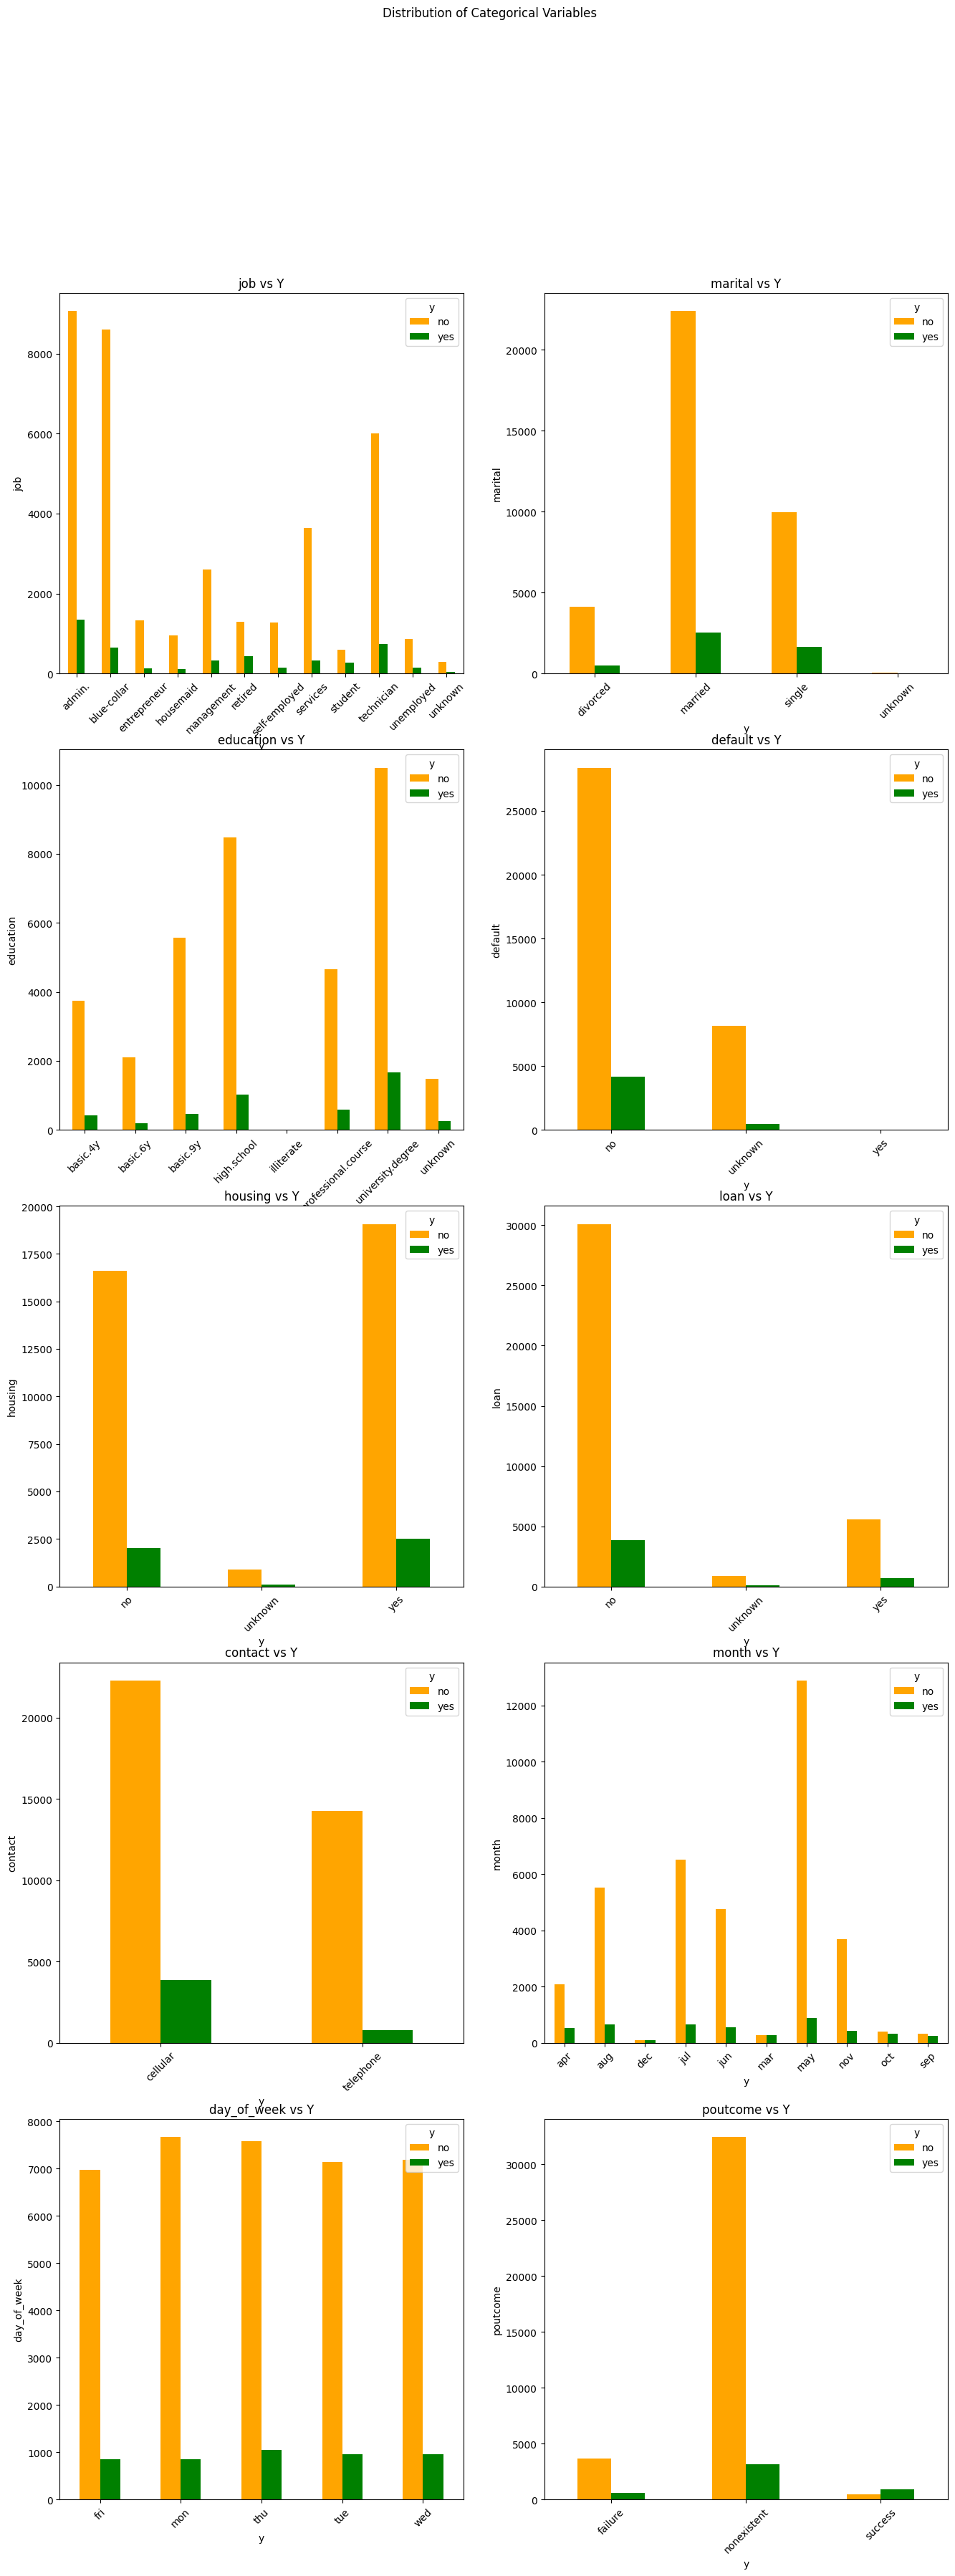

In [85]:
fig, axes = plt.subplots(nrows=int(len(categorical_predictors)/2), ncols = 2, figsize=(16, 40))
fig.suptitle('Distribution of Categorical Variables')

lin=0
for i , column in enumerate(categorical_predictors):
    col = i%2
    CrossTabResult=pd.crosstab(index=df[column], columns=df[goal_attribute])
    CrossTabResult.plot.bar(color=['orange', 'green'], ax=axes[lin,col])

    axes[lin, col].set_title(f"{column} vs Y")
    axes[lin, col].set_xlabel("y")
    axes[lin, col].set_ylabel(column)
    axes[lin, col].tick_params(axis='x', rotation=45)
    
    if i%2 == 1:
        lin = lin + 1

-----
## 2. Data Cleaning & Preprocessing, Feature Selection
-----

Int this chapter, the steps performed to clean and preprocess the dataset are described, ensuring the data quality required for modeling.
Additionally, the feature selection process is presented, aiming to identify the most relevant attributes that contribute to predicting the target variable. 

##### Information about categorical predictors

In [99]:
for col in categorical_predictors:
    print(f"{col}: {df[col].unique()}\n")


unknown_predictors = [
    col for col in categorical_predictors if df[col].astype(str).str.contains("unknown", case=False).any()
]

markdown_output = "#### Some predictors have \"unknown\" label.\n"
markdown_output += "\n".join(f"- {col}" for col in unknown_predictors)
display(Markdown(markdown_output))

job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

marital: ['married' 'single' 'divorced' 'unknown']

education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

default: ['no' 'unknown' 'yes']

housing: ['no' 'yes' 'unknown']

loan: ['no' 'yes' 'unknown']

contact: ['telephone' 'cellular']

month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']

poutcome: ['nonexistent' 'failure' 'success']



#### Some predictors have "unknown" label.
- job
- marital
- education
- default
- housing
- loan

##### Overview of the missing values and the precentage of missing values 

In [19]:
#df = df.replace('unknown', np.nan)

In [100]:
df_info = pd.DataFrame({
    'Missing Values': df.isnull().sum(),
    'Percentage Missing': (df.isnull().sum() / df.shape[0]) * 100
})
df_info.sort_values(by='Missing Values', ascending=False)

,Missing Values,Percentage Missing
age,0,0.0
campaign,0,0.0
nr.employed,0,0.0
euribor3m,0,0.0
cons.conf.idx,0,0.0
cons.price.idx,0,0.0
emp.var.rate,0,0.0
poutcome,0,0.0
previous,0,0.0
pdays,0,0.0


##### Missing Values

In [101]:
missing_values = df.isna().sum()
missing_values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [102]:
markdown_output = "##### While the dataset does not contain any missing (NaN) values, the presence of the label 'unknown' in certain predictors indicates unreported information and should be treated as missing during data cleaning."
display(Markdown(markdown_output))


# Count "unknown" values before cleaning
print("Before cleaning:")
for col in unknown_predictors:
    count = (df[col].astype(str).str.lower() == "unknown").sum()
    if count > 0:
        print(f"{col}: {count} unknowns")

df[unknown_predictors] = df[unknown_predictors].replace('unknown', pd.NA)
missing_values = df.isna().sum()

print()
print('Missing Values (Unknown converted do NaN)')
print(missing_values)

original_num_rows = df.shape[0]
print(original_num_rows)
df = df.dropna()
missing_values_after_drop = df.isna().sum()
num_rows_after_cleanup = df.shape[0]
print(num_rows_after_cleanup)

print()
print('Missing Values after cleaning')
print(missing_values_after_drop)

deleted_rows = original_num_rows-num_rows_after_cleanup
print()
print(deleted_rows, 'rows deleted')

print()
print("Dataset labels after \"unknown\" removal:")

for col in categorical_predictors:
    print(f"{col}: {df[col].unique()}\n")


##### While the dataset does not contain any missing (NaN) values, the presence of the label 'unknown' in certain predictors indicates unreported information and should be treated as missing during data cleaning.

Before cleaning:
job: 330 unknowns
marital: 80 unknowns
education: 1731 unknowns
default: 8597 unknowns
housing: 990 unknowns
loan: 990 unknowns

Missing Values (Unknown converted do NaN)
age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64
41188
30488

Missing Values after cleaning
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous     

##### Correlation Matrix

In [90]:
#plt.figure(figsize=(40, 40))
#sns.heatmap(df_all_numeric.corr(),
 #           annot=True,
  #          square=True,
   #         cmap='coolwarm',
    #        annot_kws={'size': 12})  # make numbers smaller or larger
#plt.xticks(rotation=45, ha='right', fontsize=15)
#plt.yticks(rotation=0, fontsize=15)
#plt.show()

##### Correlation matrix of numeric variables

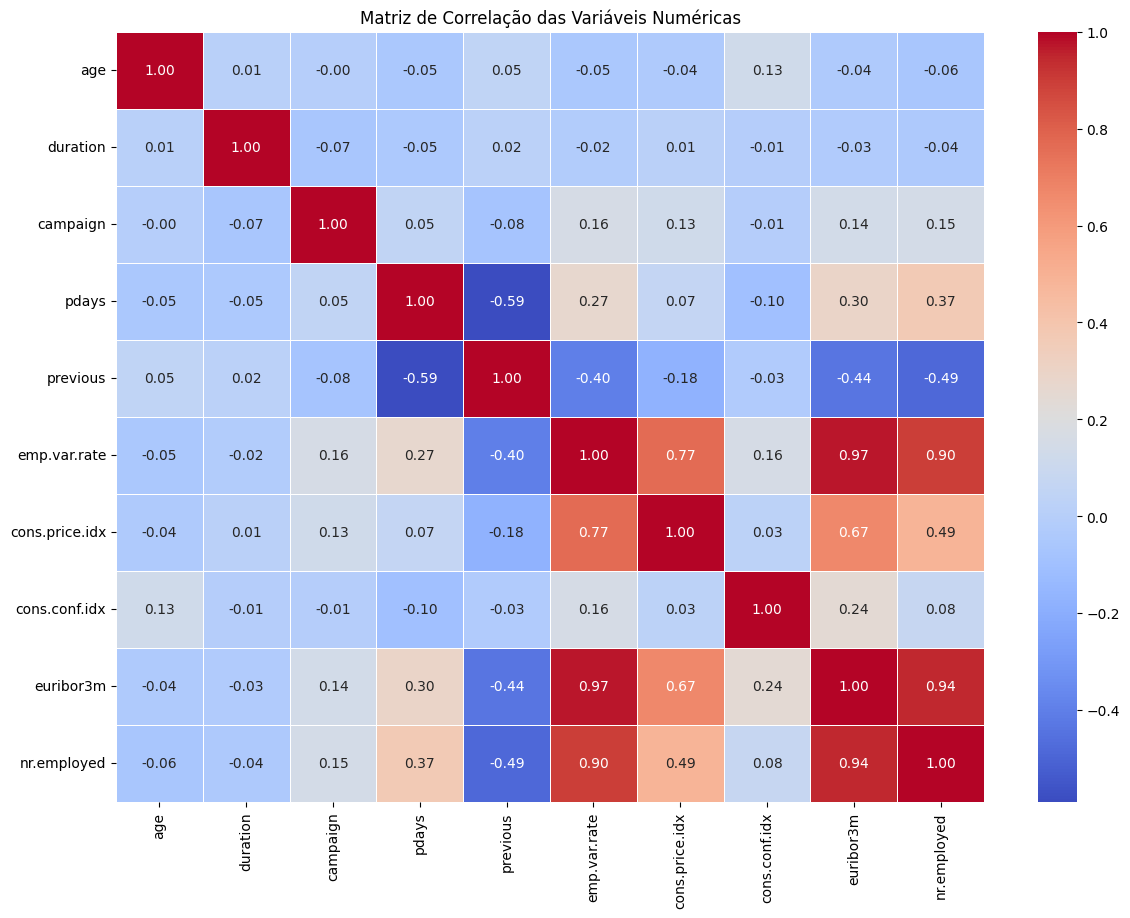

In [103]:
num_pred = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = num_pred.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()

### Pre-Processing

##### Transforming all the variables in numeric

In [105]:
df_all_numeric = df.copy()

# binary variables transformation
binary_vars = ["default", "housing", "loan", "y"]
non_binary_vars = ["job", "marital", "education", "poutcome"]

for var in binary_vars:
    df_all_numeric[var] = (df_all_numeric[var].values == 'yes').astype(int)

df_all_numeric['contact'] = (df_all_numeric['contact'].values == 'cellular').astype(int)

# non_binary variables transformation
df_all_numeric = pd.get_dummies(df_all_numeric, columns=non_binary_vars, drop_first=True, dtype=int)

# date type variables transformation
month_map = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

day_map = {
    'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5
}

df_all_numeric['month'] = df_all_numeric['month'].map(month_map)
df_all_numeric['day_of_week'] = df_all_numeric['day_of_week'].map(day_map)

# TO USE FOR SCALING DF_ALL_NUMERIC
non_binary_preds = list(numeric_predictors)
non_binary_preds.extend(["month", "day_of_week"])

df_all_numeric

,age,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,...,marital_married,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,poutcome_nonexistent,poutcome_success
0,56,0,0,0,0,5,1,261,1,999,...,1,0,0,0,0,0,0,0,1,0
2,37,0,1,0,0,5,1,226,1,999,...,1,0,0,0,1,0,0,0,1,0
3,40,0,0,0,0,5,1,151,1,999,...,1,0,1,0,0,0,0,0,1,0
4,56,0,0,1,0,5,1,307,1,999,...,1,0,0,0,1,0,0,0,1,0
6,59,0,0,0,0,5,1,139,1,999,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,0,1,0,1,11,5,334,1,999,...,1,0,0,0,0,0,1,0,1,0
41184,46,0,0,0,1,11,5,383,1,999,...,1,0,0,0,0,0,1,0,1,0
41185,56,0,1,0,1,11,5,189,2,999,...,1,0,0,0,0,0,0,1,1,0
41186,44,0,0,0,1,11,5,442,1,999,...,1,0,0,0,0,0,1,0,1,0


     Count  Percentage
y                     
no   26629   87.342561
yes   3859   12.657439


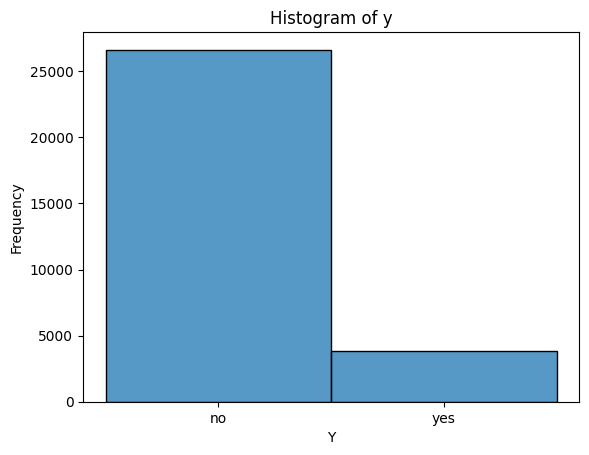

In [106]:
y_counts = df['y'].value_counts()
y_percentage = df['y'].value_counts(normalize=True)*100

y_var_dataframe = pd.DataFrame({
    "Count": y_counts,
    "Percentage": y_percentage
})

print(y_var_dataframe)

sns.histplot(df[goal_attribute])

plt.title(f"Histogram of {goal_attribute}")
plt.xlabel("Y")
plt.ylabel("Frequency")

plt.show()